<a href="https://colab.research.google.com/github/AggelosRDio/MscMachineLearning/blob/master/ML9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 9

## Install Libraries

In [1]:
!pip install swig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.4 MB/s eta 0:00:00


In [2]:
!pip install gymnasium[box2d]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 45.6 MB/s eta 0:00:00


In [3]:
!pip install renderlab

In [4]:
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 3.4 MB/s eta 0:00:00


## Core Gymnasium Functions

The three core Gymnasium functions are as follows:

1. reset(): Initializes the environment and returns the initial observation. Called at the start of each episode and returns the starting state of the environment
2. step(action): Executes one action in the environment. Takes an action as input and returns:
    - observation (new state)
    - reward(scalar)
    - terminated (bool)
    - truncated (bool)
    - info (dict)
3. render(): Visualizes the current state of the environment. Used to display what's happening during training or evaluation.

## LunarLander-v3 Environment Description

In [5]:
import gymnasium as gym

env = gym.make("LunarLander-v3")

print(f"Observation space type: \n\n {env.observation_space}")
print(f"\nAction space type: {env.action_space}")

env.close()

Observation space type: 

 Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)

Action space type: Discrete(4)


### Observation Space

Observation space is a 8-dimensional vector containing x,y position, x, y velocity, angle and angular velocity as well as left and right leg contact (bool).

### Action Space

Action space contains 4 discrete actions:
- 0: Do nothing
- 1: Fire left engine
- 2: Fire main engine
- 3: Fire right engine

### Reward Function

The reward function works following a set number of rules. Moving from top to landing pad awards +100 to +140 points. Crash results in -100 points.

Each leg contact awards 10 points and firing the engines costs points with -0.3 for the main engine and -0.03 for either left or right engine per frame.

An episode success (i.e. landing) awards 100 points.

## Random Agent with Visualization

In [6]:
import numpy as np
import renderlab as rl
# from renderlab import VideoRecorder

env = gym.make('LunarLander-v3', render_mode='rgb_array')
env = rl.RenderFrame(env, './output')

# video_rec = VideoRecorder()

episode_rewards = []

for episode in range(5):
  observation, info = env.reset()
  episode_reward = 0
  done = False

  while not done:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    episode_reward += reward
    done = terminated or truncated

    # if episode == 0:
    #   frame = env.render()
      # video_rec.add(frame)

  episode_rewards.append(episode_reward)
  print(f"Episode {episode + 1} reward: {episode_reward}")

print(f"Average reward: {sum(episode_rewards) / len(episode_rewards)}")

# video_rec.save('lunar_lander.mp4')
env.play()

env.close()


/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



Episode 1 reward: -119.87804678349782
Episode 2 reward: -75.86112872994576
Episode 3 reward: -111.5231999817848
Episode 4 reward: -350.2192064312775
Episode 5 reward: -284.55697624355236
Average reward: -188.40771163401163
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [7]:
avg_reward = np.mean(episode_rewards)

print(f"Average Reward: {avg_reward}")

Average Reward: -188.40771163401163


## Train DQN and PPO Agents

In [8]:
import time
import matplotlib.pyplot as plt
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.evaluation import evaluate_policy

env = gym.make('LunarLander-v3')

start_time = time.time()
dqn_model = DQN('MlpPolicy', env, verbose=1, learning_rate=1e-3, buffer_size=50000, learning_starts=1000, batch_size=64
                ,tau=1.0, gamma=0.99, train_freq=4, target_update_interval=250)

dqn_model.learn(total_timesteps=100000)
dqn_train_time = time.time() - start_time

print(f"DQN Training Time: {dqn_train_time}")


  return datetime.utcnow().replace(tzinfo=utc)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


  return datetime.utcnow().replace(tzinfo=utc)



----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | -270     |
|    exploration_rate | 0.961    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3344     |
|    time_elapsed     | 0        |
|    total_timesteps  | 412      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.2     |
|    ep_rew_mean      | -222     |
|    exploration_rate | 0.927    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 4048     |
|    time_elapsed     | 0        |
|    total_timesteps  | 770      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.2     |
|    ep_rew_mean      | -217     |
|    exploration_rate | 0.89     |
| time/               |          |
|    episodes       

In [9]:
start_time = time.time()
ppo_model = PPO('MlpPolicy', env, verbose=1, learning_rate=3e-4, n_steps=2048, batch_size=64, n_epochs=10, gamma=0.99, gae_lambda=0.95, clip_range=0.2)

ppo_model.learn(total_timesteps=100000)
ppo_train_time = time.time() - start_time

print(f"PPO Training Time: {ppo_train_time}")

env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 92.7     |
|    ep_rew_mean     | -149     |
| time/              |          |
|    fps             | 1166     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 98.3       |
|    ep_rew_mean          | -161       |
| time/                   |            |
|    fps                  | 857        |
|    iterations           | 2          |
|    time_elapsed         | 4          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00605796 |
|    clip_fraction        | 0.0239     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.38

## Evaluate and Compare Agents

In [10]:
eval_env = gym.make('LunarLander-v3')

dqn_mean_reward, dqn_std_reward = evaluate_policy(dqn_model, eval_env, n_eval_episodes=5)
print(f"DQN Mean Reward: {dqn_mean_reward}, Standard Deviation: {dqn_std_reward}")

ppo_mean_reward, ppo_std_reward = evaluate_policy(ppo_model, eval_env, n_eval_episodes=5)
print(f"PPO Mean Reward: {ppo_mean_reward}, Standard Deviation: {ppo_std_reward}")

eval_env.close()

  warnings.warn(



DQN Mean Reward: -60.18180363048741, Standard Deviation: 45.2973678546935
PPO Mean Reward: 15.424731851944113, Standard Deviation: 158.34736473196912


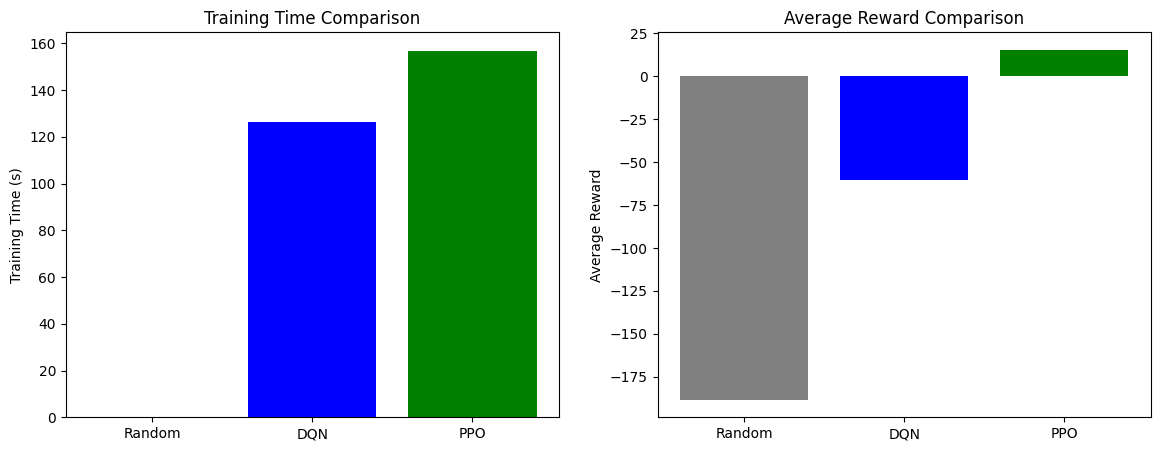

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(['Random', 'DQN', 'PPO'], [0, dqn_train_time, ppo_train_time], color=['gray', 'blue', 'green'])
axes[0].set_ylabel('Training Time (s)')
axes[0].set_title('Training Time Comparison')

axes[1].bar(['Random', 'DQN', 'PPO'], [avg_reward, dqn_mean_reward, ppo_mean_reward], color=['gray', 'blue', 'green'])
axes[1].set_ylabel('Average Reward')
axes[1].set_title('Average Reward Comparison')

plt.show()

## Optimized Hyperparameters

In [12]:
from matplotlib.colors import Normalize
env = gym.make('LunarLander-v3')

start_time = time.time()
dqn_optimized = DQN('MlpPolicy', env, verbose=1,
                    batch_size=128,
                    buffer_size=50000,
                    exploration_final_eps=0.1,
                    exploration_fraction=0.12,
                    gamma=0.99,
                    gradient_steps=-1,
                    learning_rate=0.00063,
                    learning_starts=0,
                    # policy_kwargs=dict(net_arch=[256, 256]),
                    target_update_interval=250,
                    train_freq=4
                       )

dqn_optimized.learn(total_timesteps=100000)
dqn_optimized_train_time = time.time() - start_time

print(f"DQN Optimized Training Time: {dqn_optimized_train_time}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96       |
|    ep_rew_mean      | -230     |
|    exploration_rate | 0.971    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 373      |
|    time_elapsed     | 1        |
|    total_timesteps  | 384      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 380      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | -167     |
|    exploration_rate | 0.938    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 378      |
|    time_elapsed     | 2        |
|    total_timesteps  | 824      |
| train/              |        

In [16]:
start_time = time.time()

ppo_optimized = PPO('MlpPolicy', env, verbose=1,
                    batch_size=64,
                    ent_coef=0.01,
                    gae_lambda=0.98,
                    gamma=0.999,
                    learning_rate=0.00063,
                    n_epochs=10,
                    n_steps=2048,
                    clip_range=0.2, vf_coef=0.5
                    )

ppo_optimized.learn(total_timesteps=100000)
ppo_optimized_train_time = time.time() - start_time

print(f"PPO Optimized Training Time: {ppo_optimized_train_time}")

env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 90.4     |
|    ep_rew_mean     | -194     |
| time/              |          |
|    fps             | 1004     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 93.3        |
|    ep_rew_mean          | -177        |
| time/                   |             |
|    fps                  | 735         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009525548 |
|    clip_fraction        | 0.073       |
|    clip_range           | 0.2         |
|    entropy_loss   

In [17]:
eval_env = gym.make('LunarLander-v3')

dqn_opt_mean, dqn_opt_std = evaluate_policy(dqn_optimized, eval_env, n_eval_episodes=5)
print(f"DQN Optimized Mean Reward: {dqn_opt_mean}, Standard Deviation: {dqn_opt_std}")

ppo_opt_mean, ppo_opt_std = evaluate_policy(ppo_optimized, eval_env, n_eval_episodes=5)
print(f"PPO Optimized Mean Reward: {ppo_opt_mean}, Standard Deviation: {ppo_opt_std}")

eval_env.close()

DQN Optimized Mean Reward: 237.74662022421785, Standard Deviation: 29.206112923578726
PPO Optimized Mean Reward: 121.2648685057798, Standard Deviation: 99.25302566561327


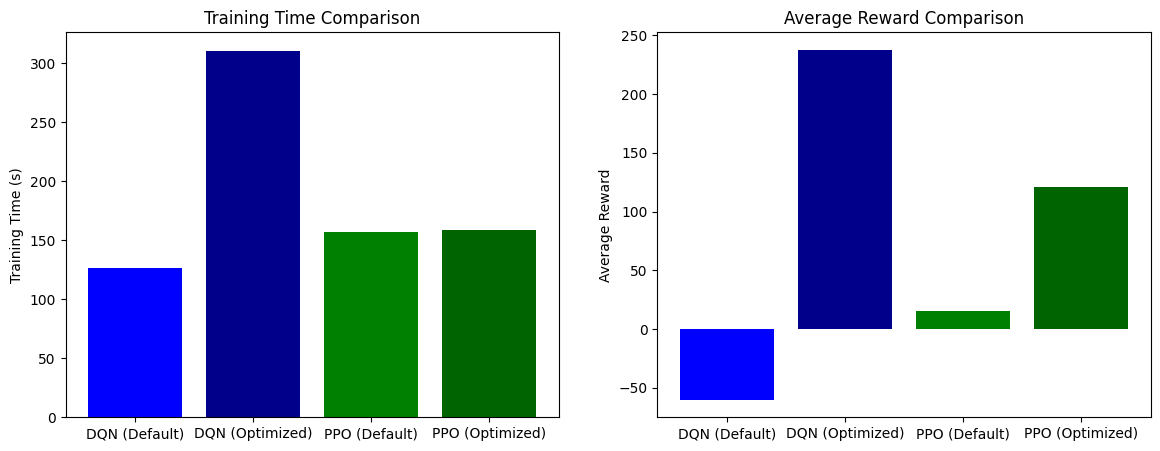

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(['DQN (Default)', 'DQN (Optimized)', 'PPO (Default)', 'PPO (Optimized)'],
            [dqn_train_time, dqn_optimized_train_time, ppo_train_time, ppo_optimized_train_time],
            color=['blue', 'darkblue', 'green', 'darkgreen'])
axes[0].set_ylabel('Training Time (s)')
axes[0].set_title('Training Time Comparison')

axes[1].bar(['DQN (Default)', 'DQN (Optimized)', 'PPO (Default)', 'PPO (Optimized)'],
            [dqn_mean_reward, dqn_opt_mean, ppo_mean_reward, ppo_opt_mean],
            color=['blue', 'darkblue', 'green', 'darkgreen'])
axes[1].set_ylabel('Average Reward')
axes[1].set_title('Average Reward Comparison')

plt.show()